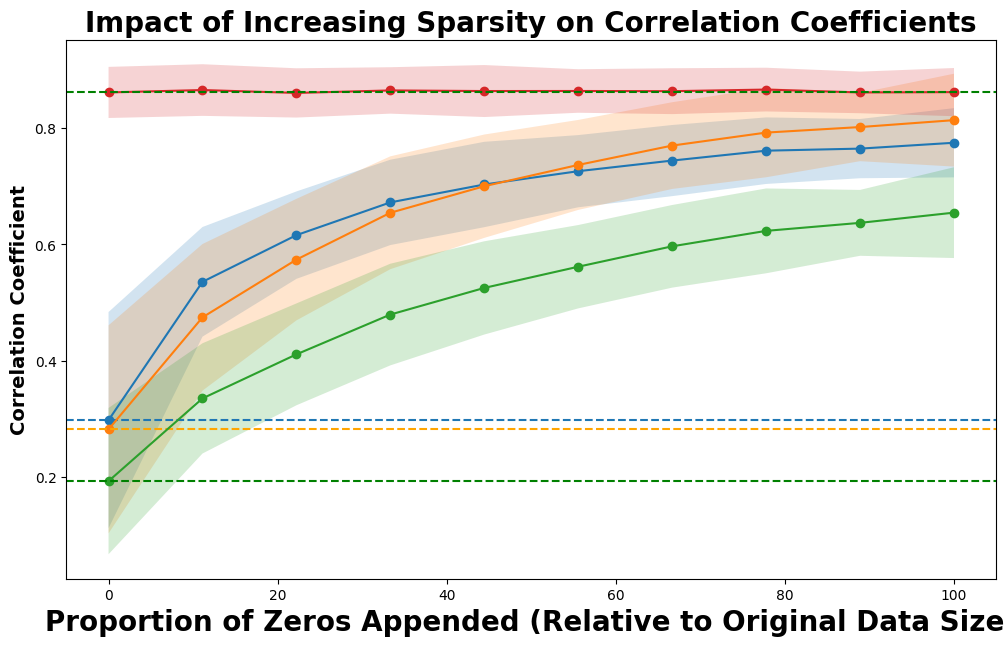

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,kendalltau,spearmanr
from sklearn.metrics.pairwise import cosine_similarity


#np.random.seed(42)

base_size = 100
append_proportions = np.linspace(0, 100, 10)  # Proportions of zeros to append

pearsons_avg_sparsity = []
pearsons_std_sparsity = []

spearman_avg_sparsity = []
spearman_std_sparsity = []

kendalltau_avg_sparsity=[]
kendalltau_std_sparsity=[]


cos_avg_sparsity = []
cos_std_sparsity = []

repetitions = 100

for proportion in append_proportions:
    temp_pearsons = [] 
    temp_spearman = [] 
    temp_kendalltau=[]
    temp_cos=[]
    
    for _ in range(repetitions):
        gene_expression_x = np.random.normal(loc=10, scale=2, size=base_size)
        noise = np.random.normal(loc=0, scale=3, size=base_size)
        gene_expression_y = 0.5 * gene_expression_x + noise
        
        num_zeros_to_append = int(base_size * (proportion / 100.0))
        zeros_to_append = np.zeros(num_zeros_to_append)
        
        gene_expression_sparse_x_appended = np.concatenate([gene_expression_x, zeros_to_append])
        gene_expression_sparse_y_appended = np.concatenate([gene_expression_y, zeros_to_append])
        
        cos_r= float(cosine_similarity([gene_expression_sparse_x_appended], [gene_expression_sparse_y_appended]))
        pearson, _ = pearsonr(gene_expression_sparse_x_appended, gene_expression_sparse_y_appended)
        spearman, _ = spearmanr(gene_expression_sparse_x_appended, gene_expression_sparse_y_appended)
        tau, _ = kendalltau(gene_expression_sparse_x_appended, gene_expression_sparse_y_appended)

        temp_pearsons.append(pearson)
        temp_spearman.append(spearman)
        temp_kendalltau.append(tau)
        temp_cos.append(cos_r)

    pearsons_avg_sparsity.append(np.mean(temp_pearsons))
    pearsons_std_sparsity.append(np.std(temp_pearsons))
    
    spearman_avg_sparsity.append(np.mean(temp_spearman))
    spearman_std_sparsity.append(np.std(temp_spearman))

    kendalltau_avg_sparsity.append(np.mean(temp_kendalltau))
    kendalltau_std_sparsity.append(np.std(temp_kendalltau))
 
    cos_avg_sparsity.append(np.mean(temp_cos))
    cos_std_sparsity.append(np.std(temp_cos))
    
# Calculate the upper and lower bounds of the 95% CI
pearson_ci_95_upper = np.array(pearsons_avg_sparsity) + 1.96 * np.array(pearsons_std_sparsity)
pearson_ci_95_lower = np.array(pearsons_avg_sparsity) - 1.96 * np.array(pearsons_std_sparsity)

spearman_ci_95_upper = np.array(spearman_avg_sparsity) + 1.96 * np.array(spearman_std_sparsity)
spearman_ci_95_lower = np.array(spearman_avg_sparsity) - 1.96 * np.array(spearman_std_sparsity)

kendalltau_ci_95_upper = np.array(kendalltau_avg_sparsity) + 1.96 * np.array(kendalltau_std_sparsity)
kendalltau_ci_95_lower = np.array(kendalltau_avg_sparsity) - 1.96 * np.array(kendalltau_std_sparsity)

cos_ci_95_upper = np.array(cos_avg_sparsity) + 1.96 * np.array(cos_std_sparsity)
cos_ci_95_lower = np.array(cos_avg_sparsity) - 1.96 * np.array(cos_std_sparsity)



fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(append_proportions, pearsons_avg_sparsity, '-o', label="Average Pearson's Correlation")
ax.fill_between(append_proportions, pearson_ci_95_lower, pearson_ci_95_upper, alpha=0.2, label="95% CI Pearson's")
ax.axhline(y=pearsons_avg_sparsity[0], linestyle='--', label="Average Initial Pearson's Correlation")

ax.plot(append_proportions, spearman_avg_sparsity, '-o', label="Average Spearman's Correlation")
ax.fill_between(append_proportions, spearman_ci_95_lower, spearman_ci_95_upper, alpha=0.2, label="95% CI Spearman's")
ax.axhline(y=spearman_avg_sparsity[0], linestyle='--', color='orange',label="Average Initial Spearman's Correlation")


ax.plot(append_proportions, kendalltau_avg_sparsity, '-o', label="Average Kendall's Tau")
ax.fill_between(append_proportions, kendalltau_ci_95_lower, kendalltau_ci_95_upper, alpha=0.2, label="95% CI Kendall's Tau")
ax.axhline(y=kendalltau_avg_sparsity[0], linestyle='--', color='green',label="Average Initial Kendal's Tau")


ax.plot(append_proportions, cos_avg_sparsity, '-o', label="Average Cosine Correlation")
ax.fill_between(append_proportions, cos_ci_95_lower, cos_ci_95_upper, alpha=0.2, label="95% CI Cosine Correlation")
ax.axhline(y=cos_avg_sparsity[0], linestyle='--', color='green',label="Average Initial Cosine Correlation")


ax.set_xlabel('Proportion of Zeros Appended (Relative to Original Data Size)', fontsize=20,weight='bold')
ax.set_ylabel("Correlation Coefficient", fontsize=14,weight='bold')
ax.set_title("Impact of Increasing Sparsity on Correlation Coefficients", fontsize=20,weight='bold')
#ax.grid(True, which='both', linestyle='--', linewidth=0.5)

#ax.legend(loc='lower right', fontsize=15)

#plt.show()
#plt.savefig('Fig/zeroInflation.pdf')
plt.savefig('Fig/zeroInflation.png',dpi=300)


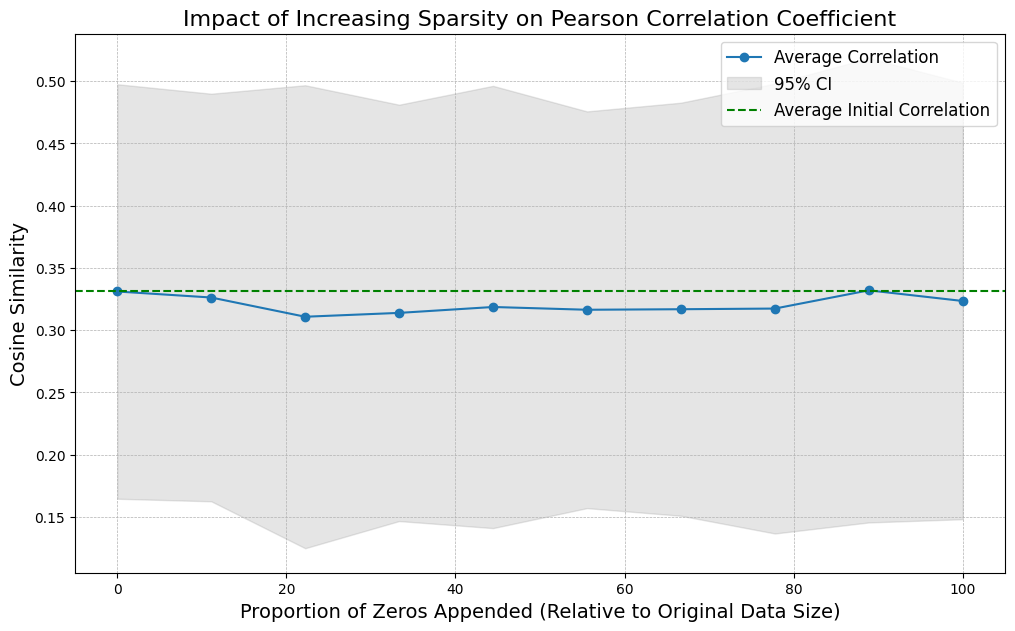

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

base_size = 100
append_proportions = np.linspace(0, 100, 10)  # Proportions of zeros to append

correlations_avg_sparsity = []
correlations_std_sparsity = []

repetitions = 100

for proportion in append_proportions:
    temp_correlations = [] 
    
    for _ in range(repetitions):
        gene_expression_x = np.random.normal(loc=10, scale=2, size=base_size)
        noise = np.random.normal(loc=0, scale=3, size=base_size)
        gene_expression_y = 0.1 * gene_expression_x + noise
        
        num_zeros_to_append = int(base_size * (proportion / 100.0))
        zeros_to_append = np.zeros(num_zeros_to_append)
        
        gene_expression_sparse_x_appended = np.concatenate([gene_expression_x, zeros_to_append])
        gene_expression_sparse_y_appended = np.concatenate([gene_expression_y, zeros_to_append])
        
        correlation= float(cosine_similarity([gene_expression_sparse_x_appended], [gene_expression_sparse_y_appended]))

        temp_correlations.append(correlation)
    
    correlations_avg_sparsity.append(np.mean(temp_correlations))
    correlations_std_sparsity.append(np.std(temp_correlations))

# Calculate the upper and lower bounds of the 95% CI
ci_95_upper = np.array(correlations_avg_sparsity) + 1.96 * np.array(correlations_std_sparsity)
ci_95_lower = np.array(correlations_avg_sparsity) - 1.96 * np.array(correlations_std_sparsity)

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(append_proportions, correlations_avg_sparsity, '-o', label='Average Correlation')
ax.fill_between(append_proportions, ci_95_lower, ci_95_upper, color='gray', alpha=0.2, label='95% CI')

ax.set_xlabel('Proportion of Zeros Appended (Relative to Original Data Size)', fontsize=14)
ax.set_ylabel('Cosine Similarity', fontsize=14)
ax.set_title('Impact of Increasing Sparsity on Pearson Correlation Coefficient', fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.axhline(y=correlations_avg_sparsity[0], color='green', linestyle='--', label='Average Initial Correlation')

ax.legend(loc='upper right', fontsize=12)

#plt.show()
#plt.savefig('Fig/zeroInflation.pdf')


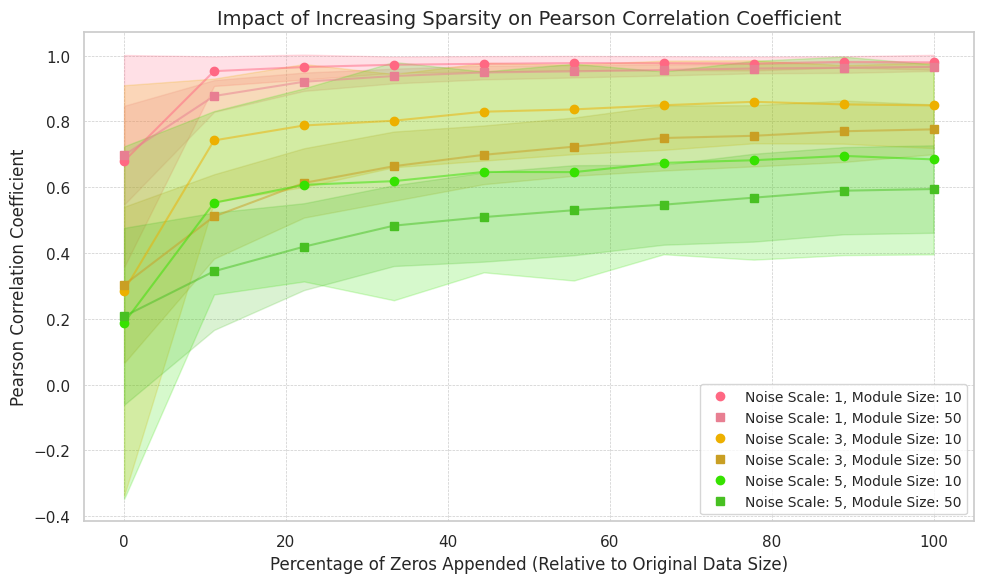

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# Set the seaborn style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("husl", 6)

# Experiment parameters
append_proportions = np.linspace(0, 1, 10)  # Proportions of zeros to append (0% to 100%)
noise_scales = [1, 3, 5]  # Different scales of noise
repetitions = 100
base_sizes = [10, 50]  # Different module sizes

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 6))

# Function to calculate correlations
def calculate_correlations(base_size, proportion, scale, repetitions):
    temp_correlations = []
    for _ in range(repetitions):
        gene_expression_x = np.random.normal(loc=10, scale=2, size=base_size)
        noise = np.random.normal(loc=0, scale=scale, size=base_size)
        gene_expression_y = 0.5 * gene_expression_x + noise
        
        num_zeros_to_append = int(base_size * proportion)
        zeros_to_append = np.zeros(num_zeros_to_append)
        
        gene_expression_sparse_x_appended = np.concatenate([gene_expression_x, zeros_to_append])
        gene_expression_sparse_y_appended = np.concatenate([gene_expression_y, zeros_to_append])
        
        correlation, _ = pearsonr(gene_expression_sparse_x_appended, gene_expression_sparse_y_appended)
        temp_correlations.append(correlation)
    
    return temp_correlations

# Perform experiment for different noise scales and module sizes
for scale, color in zip(noise_scales, palette):
    for i, base_size in enumerate(base_sizes):
        correlations_avg_sparsity = []
        correlations_std_sparsity = []
        
        # Calculate initial correlation without appending zeros
        gene_expression_x = np.random.normal(loc=10, scale=2, size=base_size)
        noise = np.random.normal(loc=0, scale=scale, size=base_size)
        gene_expression_y = 0.5 * gene_expression_x + noise
        
        # Calculate proportions of zeros to append based on base size
        proportional_append_proportions = append_proportions * (base_sizes[1] / base_size)
        
        # Calculate correlations for different proportions of zeros
        for proportion in proportional_append_proportions:
            temp_correlations = calculate_correlations(base_size, proportion, scale, repetitions)
            correlations_avg_sparsity.append(np.mean(temp_correlations))
            correlations_std_sparsity.append(np.std(temp_correlations))
        
        ci_95_upper = np.array(correlations_avg_sparsity) + 1.96 * np.array(correlations_std_sparsity)
        ci_95_lower = np.array(correlations_avg_sparsity) - 1.96 * np.array(correlations_std_sparsity)
        
        # Adjust saturation for different base sizes to increase contrast
        adjusted_color = sns.set_hls_values(color, s=1.0 - i * 0.3)  # Decrease saturation for the second base size
        
        # Plotting with shaded confidence interval
        marker = 'o' if base_size == min(base_sizes) else 's'  # Use circle for smaller module, square for larger module
        ax.plot(append_proportions * 100, correlations_avg_sparsity, '-', color=adjusted_color, alpha=0.5)
        ax.plot(append_proportions * 100, correlations_avg_sparsity, marker, color=adjusted_color, label=f'Noise Scale: {scale}, Module Size: {base_size}')
        ax.fill_between(append_proportions * 100, ci_95_lower, ci_95_upper, alpha=0.2, color=adjusted_color)

# Plot settings
ax.set_xlabel('Percentage of Zeros Appended (Relative to Original Data Size)', fontsize=12)
ax.set_ylabel('Pearson Correlation Coefficient', fontsize=12)
ax.set_title('Impact of Increasing Sparsity on Pearson Correlation Coefficient', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()


In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns



def simulate_initial_expression(coexpressed_genes, noise_scale):
    """
    Simulate initial cell expression profiles.
    """
    expression_profile_1 = np.random.normal(loc=10, scale=2, size=coexpressed_genes)
    noise = np.random.normal(loc=0, scale=noise_scale, size=coexpressed_genes)
    expression_profile_2 = 0.5 * expression_profile_1 + noise
    return expression_profile_1, expression_profile_2

def append_zeros_and_calculate_correlation(expression_profile_1, expression_profile_2, total_genes):
    """
    Append zeros to reach the total gene count and calculate Pearson correlation.
    """
    if total_genes > len(expression_profile_1):
        zeros_to_append = total_genes - len(expression_profile_1)
        expression_profile_1 = np.concatenate([expression_profile_1, np.zeros(zeros_to_append)])
        expression_profile_2 = np.concatenate([expression_profile_2, np.zeros(zeros_to_append)])
    correlation, _ = pearsonr(expression_profile_1, expression_profile_2)
    return correlation


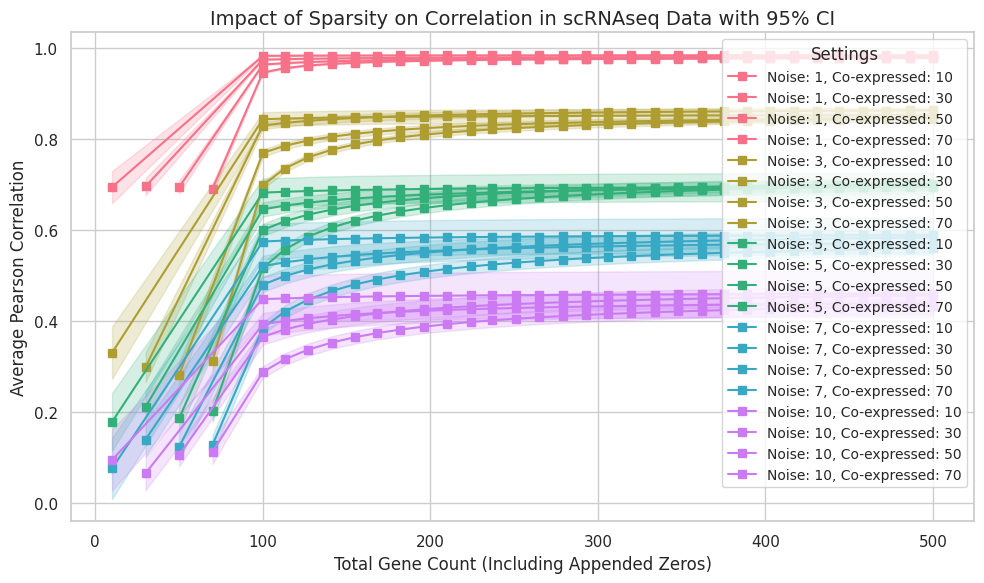

In [108]:
# Set the seaborn style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(noise_scales))  # Colors for different noise scales

# Experiment parameters
total_gene_counts = np.linspace(100, 500, 30).astype(int)  # Final lengths after appending zeros
noise_scales = [1, 3, 5,7,10]  # Scales of noise to simulate variability in gene expression
repetitions = 100
coexpressed_gene_counts = [10, 30, 50, 70]  # Initial numbers of co-expressed genes
markers = ['o', 's', '^', 'D']  # Markers for different coexpressed gene counts


fig, ax = plt.subplots(figsize=(10, 6))

correlations=np.zeros((repetitions,len(total_gene_counts)+1))

for noise_scale, color in zip(noise_scales, palette):
    for i, coexpressed_genes in enumerate(coexpressed_gene_counts):
        all_correlations = []
        for rep_i in range(repetitions):
            expression_profile_1, expression_profile_2 = simulate_initial_expression(coexpressed_genes, noise_scale)
            correlation, _ = pearsonr(expression_profile_1, expression_profile_2)
            correlations[rep_i,0]=correlation
            for i,total_genes in enumerate(total_gene_counts):
                correlation = append_zeros_and_calculate_correlation(expression_profile_1, expression_profile_2, total_genes)
                correlations[rep_i,i+1]=correlation
            # Calculate mean correlation and 95% confidence interval
        mean_corr = np.mean(correlations,axis=0)
        ci_95 = 1.96 * np.std(correlations,axis=0) / np.sqrt(repetitions)


        marker = markers[i % len(markers)]
        ax.plot(np.concatenate([[coexpressed_genes],total_gene_counts]), mean_corr, marker=marker, linestyle='-', color=color,
                    label=f'Noise: {noise_scale}, Co-expressed: {coexpressed_genes}')

        ax.fill_between(np.concatenate([[coexpressed_genes],total_gene_counts]), mean_corr - ci_95, mean_corr + ci_95, color=color, alpha=0.2)

# Customize the plot
ax.set_xlabel('Total Gene Count (Including Appended Zeros)', fontsize=12)
ax.set_ylabel('Average Pearson Correlation', fontsize=12)
ax.set_title('Impact of Sparsity on Correlation in scRNAseq Data with 95% CI', fontsize=14)
ax.legend(title='Settings', loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


0 o
1 .
2 ,
3 x


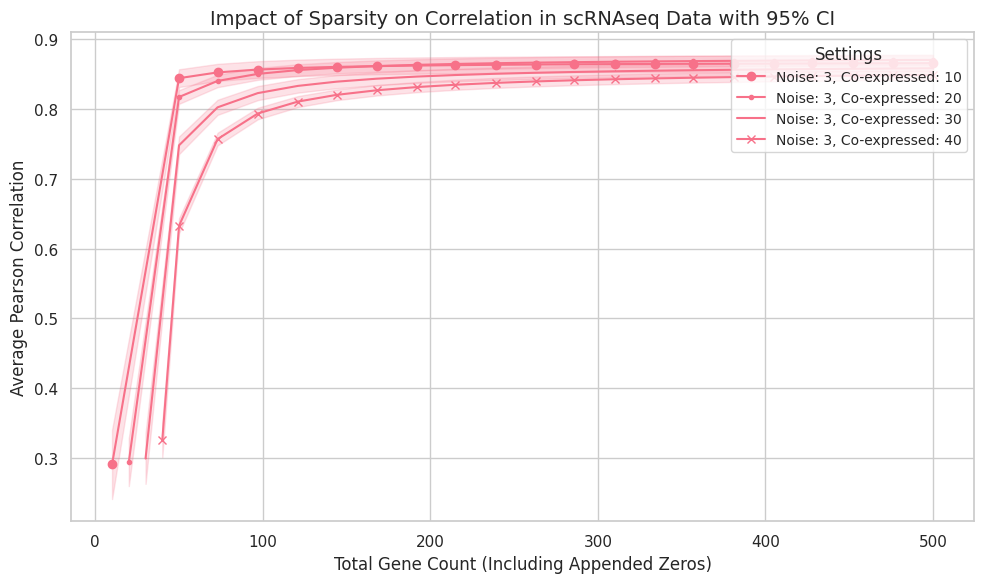

In [117]:
# Set the seaborn style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(noise_scales))  # Colors for different noise scales

# Experiment parameters
total_gene_counts = np.linspace(50, 500, 20).astype(int)  # Final lengths after appending zeros
noise_scales = [3]  # Scales of noise to simulate variability in gene expression
repetitions = 100
coexpressed_gene_counts = [10, 20, 30,40]  # Initial numbers of co-expressed genes
markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']


fig, ax = plt.subplots(figsize=(10, 6))

correlations=np.zeros((repetitions,len(total_gene_counts)+1))

for noise_scale, color in zip(noise_scales, palette):
    for i, coexpressed_genes in enumerate(coexpressed_gene_counts):
        all_correlations = []
        for rep_i in range(repetitions):
            expression_profile_1, expression_profile_2 = simulate_initial_expression(coexpressed_genes, noise_scale)
            correlation, _ = pearsonr(expression_profile_1, expression_profile_2)
            correlations[rep_i,0]=correlation
            for len_i,total_genes in enumerate(total_gene_counts):
                correlation = append_zeros_and_calculate_correlation(expression_profile_1, expression_profile_2, total_genes)
                correlations[rep_i,len_i+1]=correlation
            # Calculate mean correlation and 95% confidence interval
        mean_corr = np.mean(correlations,axis=0)
        ci_95 = 1.96 * np.std(correlations,axis=0) / np.sqrt(repetitions)
        marker = markers[i % len(markers)]
        print(i,marker)
        ax.plot(np.concatenate([[coexpressed_genes],total_gene_counts]), mean_corr, marker=marker, linestyle='-', color=color,
                    label=f'Noise: {noise_scale}, Co-expressed: {coexpressed_genes}')
        ax.fill_between(np.concatenate([[coexpressed_genes],total_gene_counts]), mean_corr - ci_95, mean_corr + ci_95, color=color, alpha=0.2)

# Customize the plot
ax.set_xlabel('Total Gene Count (Including Appended Zeros)', fontsize=12)
ax.set_ylabel('Average Pearson Correlation', fontsize=12)
ax.set_title('Impact of Sparsity on Correlation in scRNAseq Data with 95% CI', fontsize=14)
ax.legend(title='Settings', loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()
